In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [3]:
img = cv2.imread('bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR to RGB

## 1-1. cluster with only RGB values

In [4]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [14]:
h, w, c = img.shape
print(img.shape)
Z=img.reshape((-1,3))
print(Z.shape)
print(Z)

k = 2
label, center = km_clust(Z, k)
print(center)
# Now convert back to unit8, and make original image
center = np.uint8(center[:,:])
center

(1024, 1024, 3)
(1048576, 3)
[[129 175 100]
 [129 175 100]
 [129 175 100]
 ...
 [153 207 109]
 [153 207 109]
 [153 207 109]]
[[163.22627536 197.72436505 120.58396853]
 [107.6958206   95.56751108  71.60331411]]


array([[163, 197, 120],
       [107,  95,  71]], dtype=uint8)

In [12]:
label.shape

(1048576,)

In [15]:
label.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

[[163 197 120]
 [163 197 120]
 [163 197 120]
 ...
 [163 197 120]
 [163 197 120]
 [163 197 120]]
(1048576, 3)
[[[163 197 120]
  [163 197 120]
  [163 197 120]
  ...
  [163 197 120]
  [163 197 120]
  [163 197 120]]

 [[163 197 120]
  [163 197 120]
  [163 197 120]
  ...
  [163 197 120]
  [163 197 120]
  [163 197 120]]

 [[163 197 120]
  [163 197 120]
  [163 197 120]
  ...
  [163 197 120]
  [163 197 120]
  [163 197 120]]

 ...

 [[163 197 120]
  [163 197 120]
  [163 197 120]
  ...
  [163 197 120]
  [163 197 120]
  [163 197 120]]

 [[163 197 120]
  [163 197 120]
  [163 197 120]
  ...
  [163 197 120]
  [163 197 120]
  [163 197 120]]

 [[163 197 120]
  [163 197 120]
  [163 197 120]
  ...
  [163 197 120]
  [163 197 120]
  [163 197 120]]]
(1024, 1024, 3)


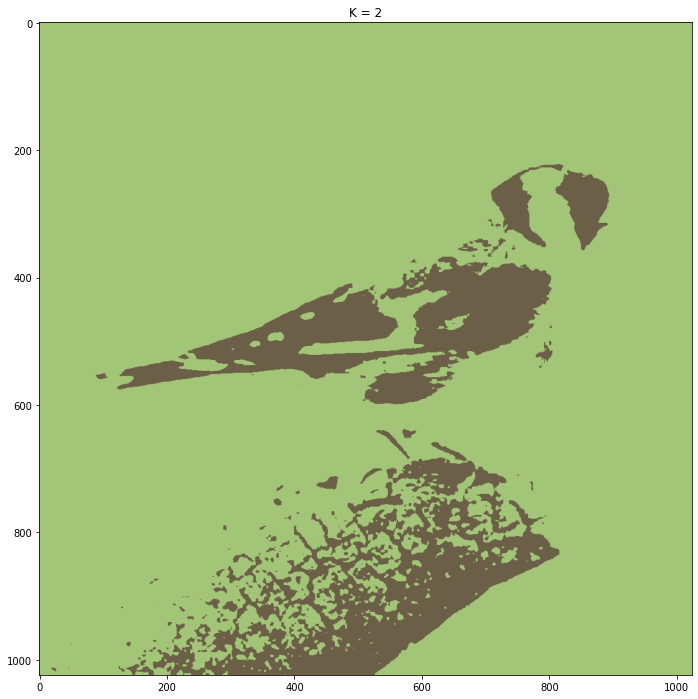

In [19]:
res = center[label.flatten()]
print(res)
print(res.shape)
res = res.reshape(img.shape)
print(res)
print(res.shape)

plt.figure(figsize=(16,12))
plt.title("K = {}".format(k))
plt.imshow(res)

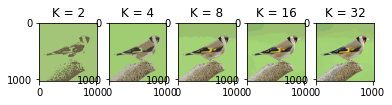

In [21]:
K = [2,4,8,16,32]
for num, i in enumerate(K): # sequence and data
  label, center = km_clust(Z, i)
  center = np.uint8(center[:,:])
  res = center[label.flatten()]
  res = res.reshape(img.shape)
  
  plt.figure(figsize=(16,12))
  plt.subplot(1,len(K),num+1)
  plt.title("K = {}".format(i))
  plt.axis('off')
  plt.imshow(res)

plt.show()

## 1-2. cluster with RGB values and the location

<Figure size 1152x864 with 0 Axes>

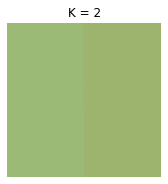

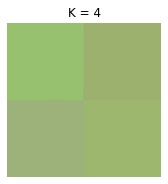

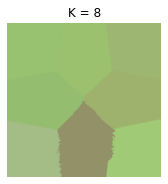

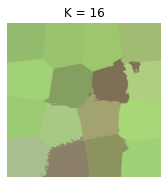

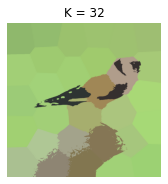

In [22]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)): #row
    for w in range(len(img[h])): #column
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.figure(figsize=(16,12))
    plt.subplot(1, len(Ks), i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

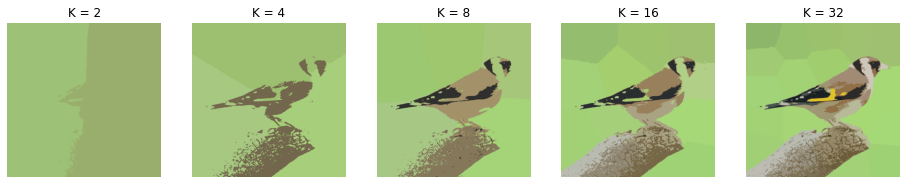

<Figure size 1152x864 with 0 Axes>

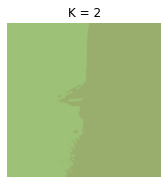

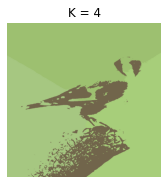

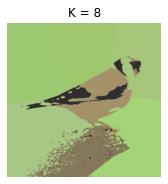

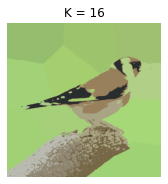

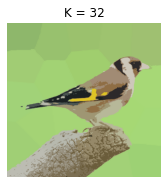

In [23]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)): #row
    for w in range(len(img[h])): #column
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]]) #both pixel value and location from 1-256
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.figure(figsize=(16,12))
    plt.subplot(1, len(Ks), i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()